Enter the angle for MCP joint rotation between 0 to 90 (in degrees): 50
Position of fingertip (relative to base frame):
x: -0.766044443118978
y: 0.0
z: 0.6427876096865394


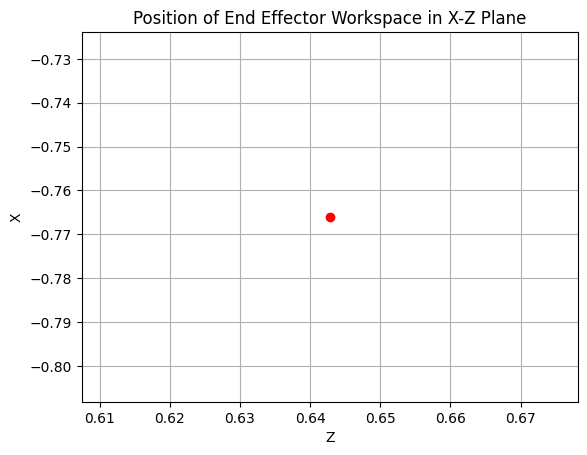

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_fingertip_position(theta1_deg):
    theta1_rad = np.deg2rad(theta1_deg)

    # Define rotation matrices for each joint (rotation about y-axis)
    R_y_theta1 = np.array([[np.cos(theta1_rad), 0, -np.sin(theta1_rad)],
                           [0, 1, 0],
                           [np.sin(theta1_rad), 0, np.cos(theta1_rad)]])

    # Transformation from base to end effector
    T_0E = R_y_theta1

    # Calculate fingertip position
    fingertip_position = np.dot(T_0E, np.array([[0], [0], [1]]))

    return fingertip_position

# User input for MCP joint angle in degrees
theta1_input = input("Enter the angle for MCP joint rotation between 0 to 90 (in degrees): ")

# Convert input to integer
try:
    theta1_input = int(theta1_input)
    if theta1_input < 0 or theta1_input > 90:
        raise ValueError
except ValueError:
    print("Invalid input! Please enter an integer angle between 0 and 90.")
    exit()

# Calculate fingertip position
fingertip_pos = calculate_fingertip_position(theta1_input)

# Print fingertip position
print("Position of fingertip (relative to base frame):")
print(f"x: {fingertip_pos[0][0]}")
print(f"y: {fingertip_pos[1][0]}")
print(f"z: {fingertip_pos[2][0]}")

# Plotting workspace in x-z plane
plt.figure()
plt.plot(fingertip_pos[2], fingertip_pos[0], 'ro')
plt.xlabel('Z')
plt.ylabel('X')
plt.title('Position of End Effector Workspace in X-Z Plane')
plt.grid(True)
plt.show()


Enter the angle for MCP joint rotation (in degrees): 90
Enter the angle for PIP joint rotation (in degrees): 40
Enter the angle for DIP joint rotation (in degrees): 35
Position of fingertip (relative to base frame):
x: [1.02486349]
y: [0.]
z: [-1.60871344]


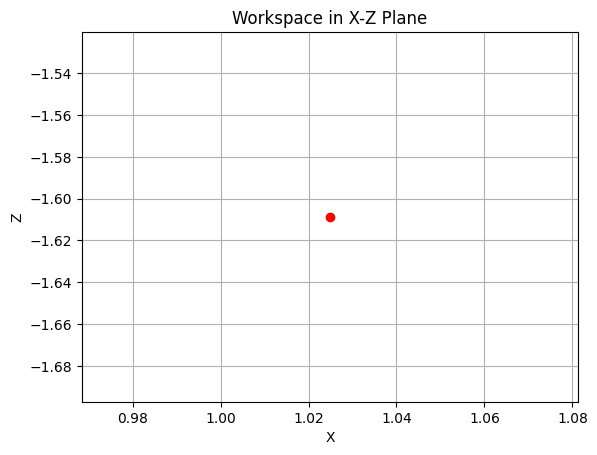

In [ ]:
#for using translational and rotational matrix
import numpy as np
import matplotlib.pyplot as plt

def calculate_fingertip_position(theta1_deg, theta2_deg, theta3_deg):
    # Convert degrees to radians
    theta1_rad = np.deg2rad(theta1_deg)
    theta2_rad = np.deg2rad(theta2_deg)
    theta3_rad = np.deg2rad(theta3_deg)

    # Define rotation matrices for each joint (rotation about y-axis)
    R_y_theta1 = np.array([[np.cos(theta1_rad), 0, np.sin(theta1_rad), 0],
                           [0, 1, 0, 0],
                           [-np.sin(theta1_rad), 0, np.cos(theta1_rad), 0],
                           [0, 0, 0, 1]])

    R_y_theta2 = np.array([[np.cos(theta2_rad), 0, np.sin(theta2_rad), 0],
                           [0, 1, 0, 0],
                           [-np.sin(theta2_rad), 0, np.cos(theta2_rad), 0],
                           [0, 0, 0, 1]])

    R_y_theta3 = np.array([[np.cos(theta3_rad), 0, np.sin(theta3_rad), 0],
                           [0, 1, 0, 0],
                           [-np.sin(theta3_rad), 0, np.cos(theta3_rad), 0],
                           [0, 0, 0, 1]])

    # Define translation matrices
    T_01 = np.array([[1, 0, 0, 0.],
                     [0, 1, 0, 0.],
                     [0, 0, 1, 0.],
                     [0, 0, 0, 1]])

    T_12 = np.array([[1, 0, 0, 0.],
                     [0, 1, 0, 0.],
                     [0, 0, 1, 1.],
                     [0, 0, 0, 1]])

    T_23 = np.array([[1, 0, 0, 0.],
                     [0, 1, 0, 0.],
                     [0, 0, 1, 1.],
                     [0, 0, 0, 1]])

    # Combine rotation and translation matrices
    T_0E = np.dot(R_y_theta1, np.dot(T_01, np.dot(R_y_theta2, np.dot(T_12, np.dot(R_y_theta3, T_23)))))

    # Calculate fingertip position
    fingertip_position = np.dot(T_0E, np.array([[0], [0], [0], [1]]))[:3]

    return fingertip_position

# User input for joint angles in degrees
theta1_input = float(input("Enter the angle for MCP joint rotation (in degrees): "))
theta2_input = float(input("Enter the angle for PIP joint rotation (in degrees): "))
theta3_input = float(input("Enter the angle for DIP joint rotation (in degrees): "))

# Calculate fingertip position
fingertip_pos = calculate_fingertip_position(theta1_input, theta2_input, theta3_input)

# Print fingertip position
print("Position of fingertip (relative to base frame):")
print(f"x: {fingertip_pos[0]}")
print(f"y: {fingertip_pos[1]}")
print(f"z: {fingertip_pos[2]}")

# Plotting workspace in x-z plane
plt.figure()
plt.plot(fingertip_pos[0], fingertip_pos[2], 'ro')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Workspace in X-Z Plane')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def calculate_fingertip_position(theta1_deg, theta2_deg, theta3_deg):
    # Convert degrees to radians
    theta1_rad = np.deg2rad(theta1_deg)
    theta2_rad = np.deg2rad(theta2_deg)
    theta3_rad = np.deg2rad(theta3_deg)

    # Define rotation matrices for each joint (rotation about y-axis)
    R_y_theta1 = np.array([[np.cos(theta1_rad), 0, np.sin(theta1_rad), 0],
                           [0, 1, 0, 0],
                           [-np.sin(theta1_rad), 0, np.cos(theta1_rad), 0],
                           [0, 0, 0, 1]])

    R_y_theta2 = np.array([[np.cos(theta2_rad), 0, np.sin(theta2_rad), 0],
                           [0, 1, 0, 0],
                           [-np.sin(theta2_rad), 0, np.cos(theta2_rad), 0],
                           [0, 0, 0, 1]])

    R_y_theta3 = np.array([[np.cos(theta3_rad), 0, np.sin(theta3_rad), 0],
                           [0, 1, 0, 0],
                           [-np.sin(theta3_rad), 0, np.cos(theta3_rad), 0],
                           [0, 0, 0, 1]])

    # Define translation matrices
    T_01 = np.array([[1, 0, 0, 0.],
                     [0, 1, 0, 0.],
                     [0, 0, 1, 0.],
                     [0, 0, 0, 1]])

    T_12 = np.array([[1, 0, 0, 0.],
                     [0, 1, 0, 0.],
                     [0, 0, 1, 1.],
                     [0, 0, 0, 1]])

    T_23 = np.array([[1, 0, 0, 0.],
                     [0, 1, 0, 0.],
                     [0, 0, 1, 1.],
                     [0, 0, 0, 1]])

    # Combine rotation and translation matrices
    T_0E = np.dot(R_y_theta1, np.dot(T_01, np.dot(R_y_theta2, np.dot(T_12, np.dot(R_y_theta3, T_23)))))

    # Calculate fingertip position
    fingertip_position = np.dot(T_0E, np.array([[0], [0], [0], [1]]))[:3]

    return fingertip_position

# Function to update the plot
def update_plot(theta1_deg, theta2_deg, theta3_deg):
    # Calculate fingertip position
    fingertip_pos = calculate_fingertip_position(theta1_deg, theta2_deg, theta3_deg)

    # Plot fingertip position
    plt.figure()
    plt.plot(fingertip_pos[0], fingertip_pos[2], 'ro')
    plt.xlabel('X')
    plt.ylabel('Z')
    plt.title('Workspace in X-Z Plane')
    plt.grid(True)
    plt.show()

# Use ipywidget.interact to create interactive plot
interact(update_plot, theta1_deg=FloatSlider(min=0, max=90, step=1, value=86), #MCP 0 to 90
         theta2_deg=FloatSlider(min=0, max=100, step=1, value=56),              #DIP 0 to 100
         theta3_deg=FloatSlider(min=0, max=80, step=1, value=56))              #PIP 0 to 80


interactive(children=(FloatSlider(value=86.0, description='theta1_deg', max=90.0, step=1.0), FloatSlider(value…

<function __main__.update_plot(theta1_deg, theta2_deg, theta3_deg)>

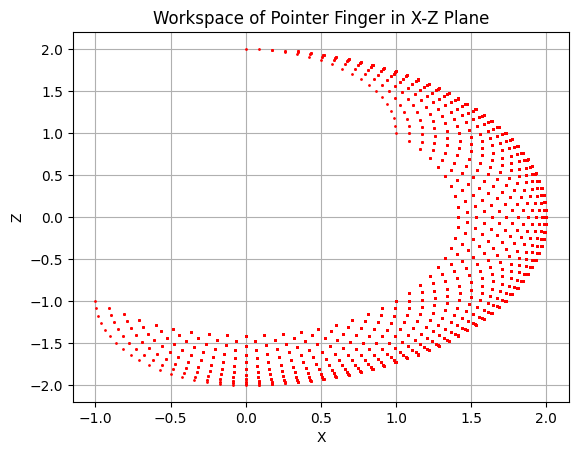

In [ ]:
#for all angle complete workflow
import numpy as np
import matplotlib.pyplot as plt

def calculate_fingertip_position(theta1_deg, theta2_deg, theta3_deg):
    # Convert degrees to radians
    theta1_rad = np.deg2rad(theta1_deg)
    theta2_rad = np.deg2rad(theta2_deg)
    theta3_rad = np.deg2rad(theta3_deg)

    # Define rotation matrices for each joint (rotation about y-axis)
    R_y_theta1 = np.array([[np.cos(theta1_rad), 0, np.sin(theta1_rad), 0],
                           [0, 1, 0, 0],
                           [-np.sin(theta1_rad), 0, np.cos(theta1_rad), 0],
                           [0, 0, 0, 1]])

    R_y_theta2 = np.array([[np.cos(theta2_rad), 0, np.sin(theta2_rad), 0],
                           [0, 1, 0, 0],
                           [-np.sin(theta2_rad), 0, np.cos(theta2_rad), 0],
                           [0, 0, 0, 1]])

    R_y_theta3 = np.array([[np.cos(theta3_rad), 0, np.sin(theta3_rad), 0],
                           [0, 1, 0, 0],
                           [-np.sin(theta3_rad), 0, np.cos(theta3_rad), 0],
                           [0, 0, 0, 1]])

    # Define translation matrices
    T_01 = np.array([[1, 0, 0, 0.],
                     [0, 1, 0, 0.],
                     [0, 0, 1, 0.],
                     [0, 0, 0, 1]])

    T_12 = np.array([[1, 0, 0, 0.],
                     [0, 1, 0, 0.],
                     [0, 0, 1, 1.],
                     [0, 0, 0, 1]])

    T_23 = np.array([[1, 0, 0, 0.],
                     [0, 1, 0, 0.],
                     [0, 0, 1, 1.],
                     [0, 0, 0, 1]])

    # Combine rotation and translation matrices
    T_0E = np.dot(R_y_theta1, np.dot(T_01, np.dot(R_y_theta2, np.dot(T_12, np.dot(R_y_theta3, T_23)))))

    # Calculate fingertip position
    fingertip_position = np.dot(T_0E, np.array([[0], [0], [0], [1]]))[:3]

    return fingertip_position

# Initialize lists to store fingertip positions
fingertip_positions = []

# Iterate through a range of angles for each joint (MCP, PIP, DIP)
for theta1 in range(0, 91, 5):
    for theta2 in range(0, 91, 5):
        for theta3 in range(0, 91, 5):
            fingertip_pos = calculate_fingertip_position(theta1, theta2, theta3)
            fingertip_positions.append(fingertip_pos)

# Extract x and z coordinates from fingertip positions
x_coords = [pos[0] for pos in fingertip_positions]
z_coords = [pos[2] for pos in fingertip_positions]

# Plotting workspace in x-z plane
plt.figure()
plt.plot(x_coords, z_coords, 'ro', markersize=1)
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Workspace of Pointer Finger in X-Z Plane')
plt.grid(True)
plt.show()